In [18]:
#MAIN TEST FILE
#reading whole images


import cv2 as cv2   #importing opevcv
import numpy as np
import csv
import os

path = "dataset"
ext = [".jpeg", ".jpg", ".png"]
numOfContours=0

#getting all filenames in a folder
fileNameExtList = []
fileNameOnlyList = []
for file in os.listdir(path):
    if file.endswith(tuple(ext)):
        fileNameExtList.append(file)
        #print(os.path.join(path, file)) #== 'symptoms/11085_left.jpeg'
        fileName, extension = os.path.splitext(file)
        fileNameOnlyList.append(fileName)

#ROI manual specs
x = 65
y = 65
w = 300
h = 190

#writing to a csv file
csvTitle = [['image_name', 'count', 'area']]
csvData = []

contourThreshold = 5

for fileName in fileNameExtList:
    img = cv2.imread(os.path.join(path,fileName))    #reading an image
    img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
    #cv2.imshow('orginal', img_rs)
    print(fileName)
    
    imCrop = img_rs[y:y+h, x:x+w]
    #cv2.imshow("Image", imCrop)
    
    hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    clr_rng_img = cv2.inRange(hsv_im,(19,0,250), (255,255,255)) 
    #cv2.imshow('color range orginal', clr_rng_img);    
    
    #contour drawing test code
    image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    numOfContours1 = len(contours)   #number of contours
    
    if numOfContours1 > contourThreshold:
        #19,0, 111
        clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
        #contour drawing test code
        image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        numOfContours = len(contours)   #number of contours
    
    
        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)
        #cv2.imshow("Bounding box",imCrop)

        csvData.append([fileName, numOfContours, sumOfArea])
   
    else:

        print("contours = ",numOfContours)
        area = []

        for contour in contours:
            x1,y1,w1,h1 = cv2.boundingRect(contour)
            cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
            area.append(w1*h1)

        
        try:
            maxArea = max(area)
            print("max area = ", maxArea)
        except:
            maxArea = 0
        try:
            area.remove(maxArea)
        except:
            maxArea = 0
        sumOfArea = sum(area)
        print("sum of Area =",sumOfArea)

        csvData.append([fileName, numOfContours, sumOfArea])
        
        
with open('dr_features.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvTitle)
    writer.writerows(csvData)


#keyboard binding function
k = cv2.waitKey(0);   
if k == 27:           #wait for ESC key to exit
    cv2.destroyAllWindows();     #destroys all windows created
    
    
    
    
    
    


14654_right.jpeg
('contours = ', 0)
('sum of Area =', 0)
1123_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
14967_right.jpeg
('contours = ', 0)
('max area = ', 676)
('sum of Area =', 0)
13176_left.jpeg
('contours = ', 0)
('max area = ', 180)
('sum of Area =', 41)
15520_left.jpeg
('contours = ', 0)
('max area = ', 266)
('sum of Area =', 1)
14938_right.jpeg
('contours = ', 0)
('max area = ', 80)
('sum of Area =', 0)
14692_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
15210_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
15325_left.jpeg
('contours = ', 0)
('max area = ', 432)
('sum of Area =', 9)
12998_left.jpeg
('contours = ', 0)
('sum of Area =', 0)
14091_right.jpeg
('contours = ', 661)
('max area = ', 1680)
('sum of Area =', 8228)
14594_left.jpeg
('contours = ', 661)
('max area = ', 816)
('sum of Area =', 4)
15023_right.jpeg
('contours = ', 47)
('max area = ', 5460)
('sum of Area =', 924)
12990_right.jpeg
('contours = ', 47)
('sum of Area =', 0)
14981_left.jpeg
('contours = '

11298_right.jpeg
('contours = ', 34)
('max area = ', 528)
('sum of Area =', 190)
14374_right.jpeg
('contours = ', 34)
('max area = ', 266)
('sum of Area =', 0)
14530_right.jpeg
('contours = ', 34)
('sum of Area =', 0)
10977_right.jpeg
('contours = ', 37)
('max area = ', 1952)
('sum of Area =', 3630)
14672_left.jpeg
('contours = ', 37)
('max area = ', 448)
('sum of Area =', 0)
15540_right.jpeg
('contours = ', 37)
('sum of Area =', 0)
12437_right.jpeg
('contours = ', 37)
('sum of Area =', 0)
15060_right.jpeg
('contours = ', 37)
('sum of Area =', 0)
1500_right.jpeg
('contours = ', 37)
('max area = ', 456)
('sum of Area =', 0)
16496_left.jpeg
('contours = ', 37)
('max area = ', 104)
('sum of Area =', 1)
10468_left.jpeg
('contours = ', 37)
('max area = ', 192)
('sum of Area =', 7)
15849_left.jpeg
('contours = ', 269)
('max area = ', 18620)
('sum of Area =', 16136)
16324_left.jpeg
('contours = ', 32)
('max area = ', 2021)
('sum of Area =', 525)
13122_right.jpeg
('contours = ', 32)
('max area

14350_left.jpeg
('contours = ', 644)
('max area = ', 26030)
('sum of Area =', 11546)
13160_left.jpeg
('contours = ', 644)
('sum of Area =', 0)
1493_right.jpeg
('contours = ', 644)
('max area = ', 63)
('sum of Area =', 0)
12246_right.jpeg
('contours = ', 644)
('sum of Area =', 0)
1336_right.jpeg
('contours = ', 644)
('max area = ', 960)
('sum of Area =', 118)
15253_right.jpeg
('contours = ', 644)
('max area = ', 80)
('sum of Area =', 4)
1495_left.jpeg
('contours = ', 22)
('max area = ', 1392)
('sum of Area =', 114)
13400_right.jpeg
('contours = ', 138)
('max area = ', 208)
('sum of Area =', 785)
15002_right.jpeg
('contours = ', 138)
('max area = ', 441)
('sum of Area =', 152)
13259_right.jpeg
('contours = ', 138)
('max area = ', 304)
('sum of Area =', 26)
14712_right.jpeg
('contours = ', 225)
('max area = ', 6460)
('sum of Area =', 6779)
11163_right.jpeg
('contours = ', 7)
('max area = ', 418)
('sum of Area =', 58)
15302_left.jpeg
('contours = ', 7)
('sum of Area =', 0)
14715_left.jpeg


13285_left.jpeg
('contours = ', 697)
('sum of Area =', 0)
12805_left.jpeg
('contours = ', 697)
('sum of Area =', 0)
14595_right.jpeg
('contours = ', 697)
('max area = ', 70)
('sum of Area =', 6)
15756_right.jpeg
('contours = ', 697)
('sum of Area =', 0)
15040_left.jpeg
('contours = ', 697)
('max area = ', 272)
('sum of Area =', 2)
10545_right.jpeg
('contours = ', 38)
('max area = ', 50160)
('sum of Area =', 103)
13409_left.jpeg
('contours = ', 38)
('sum of Area =', 0)
14201_left.jpeg
('contours = ', 38)
('max area = ', 825)
('sum of Area =', 493)
14404_left.jpeg
('contours = ', 38)
('sum of Area =', 0)
15134_right.jpeg
('contours = ', 38)
('sum of Area =', 0)
14645_right.jpeg
('contours = ', 38)
('max area = ', 414)
('sum of Area =', 9)
14761_left.jpeg
('contours = ', 38)
('sum of Area =', 0)
14943_left.jpeg
('contours = ', 167)
('max area = ', 7220)
('sum of Area =', 4626)
13643_right.jpeg
('contours = ', 167)
('sum of Area =', 0)
15696_right.jpeg
('contours = ', 167)
('sum of Area ='

13260_left.jpeg
('contours = ', 172)
('max area = ', 10640)
('sum of Area =', 19118)
14465_right.jpeg
('contours = ', 172)
('sum of Area =', 0)
10112_left.jpeg
('contours = ', 172)
('sum of Area =', 0)
14780_left.jpeg
('contours = ', 172)
('sum of Area =', 0)
14935_left.jpeg
('contours = ', 172)
('sum of Area =', 0)
13213_right.jpeg
('contours = ', 121)
('max area = ', 2916)
('sum of Area =', 3455)
14687_right.jpeg
('contours = ', 121)
('sum of Area =', 0)
13294_right.jpeg
('contours = ', 121)
('max area = ', 330)
('sum of Area =', 5)
15454_left.jpeg
('contours = ', 121)
('max area = ', 99)
('sum of Area =', 0)
12311_left.jpeg
('contours = ', 121)
('sum of Area =', 0)
1050_left.jpeg
('contours = ', 337)
('max area = ', 7986)
('sum of Area =', 12192)
14955_right.jpeg
('contours = ', 337)
('max area = ', 1053)
('sum of Area =', 25)
15314_left.jpeg
('contours = ', 337)
('sum of Area =', 0)
12563_left.jpeg
('contours = ', 337)
('sum of Area =', 0)
11125_left.jpeg
('contours = ', 337)
('sum

13156_left.jpeg
('contours = ', 9)
('max area = ', 70)
('sum of Area =', 28)
14886_right.jpeg
('contours = ', 9)
('sum of Area =', 0)
15239_left.jpeg
('contours = ', 9)
('max area = ', 54)
('sum of Area =', 49)
12133_right.jpeg
('contours = ', 9)
('max area = ', 1500)
('sum of Area =', 26)
15062_right.jpeg
('contours = ', 6)
('max area = ', 42)
('sum of Area =', 40)
15522_right.jpeg
('contours = ', 6)
('sum of Area =', 0)
15066_left.jpeg
('contours = ', 6)
('max area = ', 440)
('sum of Area =', 94)
10994_left.jpeg
('contours = ', 18)
('max area = ', 11590)
('sum of Area =', 1027)
12991_left.jpeg
('contours = ', 18)
('max area = ', 714)
('sum of Area =', 7)
13038_left.jpeg
('contours = ', 92)
('max area = ', 1980)
('sum of Area =', 1664)
12306_left.jpeg
('contours = ', 92)
('max area = ', 25)
('sum of Area =', 1)
15539_right.jpeg
('contours = ', 92)
('max area = ', 221)
('sum of Area =', 146)
14664_left.jpeg
('contours = ', 92)
('max area = ', 780)
('sum of Area =', 11)
14616_left.jpeg


15193_left.jpeg
('contours = ', 28)
('max area = ', 520)
('sum of Area =', 0)
14905_left.jpeg
('contours = ', 28)
('sum of Area =', 0)
12187_right.jpeg
('contours = ', 336)
('max area = ', 43320)
('sum of Area =', 2954)
15297_right.jpeg
('contours = ', 336)
('sum of Area =', 0)
12614_right.jpeg
('contours = ', 336)
('sum of Area =', 0)
15859_right.jpeg
('contours = ', 336)
('sum of Area =', 0)
14424_right.jpeg
('contours = ', 336)
('sum of Area =', 0)
10645_left.jpeg
('contours = ', 336)
('sum of Area =', 0)
12614_left.jpeg
('contours = ', 336)
('max area = ', 6)
('sum of Area =', 0)
14858_right.jpeg
('contours = ', 336)
('max area = ', 36)
('sum of Area =', 33)
10920_left.jpeg
('contours = ', 336)
('max area = ', 224)
('sum of Area =', 76)
1182_left.jpeg
('contours = ', 336)
('max area = ', 1218)
('sum of Area =', 79)
15288_left.jpeg
('contours = ', 21)
('max area = ', 800)
('sum of Area =', 58)
13350_left.jpeg
('contours = ', 21)
('max area = ', 108)
('sum of Area =', 49)
14843_left.

1609_left.jpeg
('contours = ', 63)
('sum of Area =', 0)
14270_right.jpeg
('contours = ', 89)
('max area = ', 6110)
('sum of Area =', 1692)
11408_left.jpeg
('contours = ', 89)
('sum of Area =', 0)
1524_right.jpeg
('contours = ', 156)
('max area = ', 40090)
('sum of Area =', 9157)
12095_right.jpeg
('contours = ', 156)
('max area = ', 1204)
('sum of Area =', 14)
14927_left.jpeg
('contours = ', 3)
('max area = ', 399)
('sum of Area =', 2)
14386_left.jpeg
('contours = ', 3)
('max area = ', 117)
('sum of Area =', 0)
13012_left.jpeg
('contours = ', 3)
('max area = ', 1365)
('sum of Area =', 9)
15477_right.jpeg
('contours = ', 102)
('max area = ', 1196)
('sum of Area =', 1716)
12095_left.jpeg
('contours = ', 14)
('max area = ', 1566)
('sum of Area =', 158)
11299_right.jpeg
('contours = ', 14)
('max area = ', 285)
('sum of Area =', 5)
15174_left.jpeg
('contours = ', 106)
('max area = ', 780)
('sum of Area =', 1483)
15476_right.jpeg
('contours = ', 106)
('max area = ', 216)
('sum of Area =', 0)


13465_right.jpeg
('contours = ', 6)
('max area = ', 1)
('sum of Area =', 0)
11304_right.jpeg
('contours = ', 42)
('max area = ', 1892)
('sum of Area =', 1916)
10356_right.jpeg
('contours = ', 42)
('max area = ', 320)
('sum of Area =', 54)
15268_left.jpeg
('contours = ', 42)
('sum of Area =', 0)
11505_right.jpeg
('contours = ', 42)
('max area = ', 589)
('sum of Area =', 0)
10945_left.jpeg
('contours = ', 534)
('max area = ', 9310)
('sum of Area =', 7851)
10787_right.jpeg
('contours = ', 10)
('max area = ', 195)
('sum of Area =', 41)
15216_left.jpeg
('contours = ', 10)
('max area = ', 440)
('sum of Area =', 0)
10694_left.jpeg
('contours = ', 10)
('sum of Area =', 0)
12436_right.jpeg
('contours = ', 10)
('max area = ', 975)
('sum of Area =', 7)
10379_right.jpeg
('contours = ', 268)
('max area = ', 5704)
('sum of Area =', 16303)
1495_right.jpeg
('contours = ', 268)
('sum of Area =', 0)
1102_left.jpeg
('contours = ', 180)
('max area = ', 4800)
('sum of Area =', 5342)
13130_right.jpeg
('cont

14567_left.jpeg
('contours = ', 102)
('max area = ', 117)
('sum of Area =', 2)
15069_left.jpeg
('contours = ', 102)
('max area = ', 143)
('sum of Area =', 2)
16481_right.jpeg
('contours = ', 102)
('max area = ', 851)
('sum of Area =', 72)
12985_right.jpeg
('contours = ', 102)
('max area = ', 264)
('sum of Area =', 144)
14181_left.jpeg
('contours = ', 182)
('max area = ', 285)
('sum of Area =', 1202)
16341_left.jpeg
('contours = ', 182)
('max area = ', 12)
('sum of Area =', 2)
16206_left.jpeg
('contours = ', 182)
('sum of Area =', 0)
1299_left.jpeg
('contours = ', 182)
('max area = ', 414)
('sum of Area =', 0)
14119_right.jpeg
('contours = ', 19)
('max area = ', 88)
('sum of Area =', 66)
11970_left.jpeg
('contours = ', 19)
('max area = ', 682)
('sum of Area =', 0)
1536_left.jpeg
('contours = ', 11)
('max area = ', 224)
('sum of Area =', 179)
15069_right.jpeg
('contours = ', 297)
('max area = ', 1504)
('sum of Area =', 1644)
14104_right.jpeg
('contours = ', 15)
('max area = ', 840)
('sum

1527_right.jpeg
('contours = ', 55)
('max area = ', 320)
('sum of Area =', 6)
15144_left.jpeg
('contours = ', 127)
('max area = ', 10830)
('sum of Area =', 11216)
16313_left.jpeg
('contours = ', 127)
('sum of Area =', 0)
12126_left.jpeg
('contours = ', 127)
('sum of Area =', 0)
14950_left.jpeg
('contours = ', 7)
('max area = ', 2183)
('sum of Area =', 606)
15775_left.jpeg
('contours = ', 370)
('max area = ', 7519)
('sum of Area =', 16965)
14559_left.jpeg
('contours = ', 370)
('sum of Area =', 0)
14883_right.jpeg
('contours = ', 370)
('max area = ', 6)
('sum of Area =', 2)
1322_right.jpeg
('contours = ', 370)
('max area = ', 130)
('sum of Area =', 0)
13751_right.jpeg
('contours = ', 370)
('max area = ', 32)
('sum of Area =', 0)
16060_right.jpeg
('contours = ', 370)
('max area = ', 294)
('sum of Area =', 0)
1492_right.jpeg
('contours = ', 370)
('sum of Area =', 0)
14685_right.jpeg
('contours = ', 370)
('max area = ', 1)
('sum of Area =', 0)
11997_left.jpeg
('contours = ', 34)
('max area 

14533_right.jpeg
('contours = ', 49)
('max area = ', 96)
('sum of Area =', 6)
13780_left.jpeg
('contours = ', 49)
('max area = ', 4875)
('sum of Area =', 526)
15690_left.jpeg
('contours = ', 49)
('sum of Area =', 0)
1541_left.jpeg
('contours = ', 49)
('max area = ', 50)
('sum of Area =', 0)
14568_left.jpeg
('contours = ', 77)
('max area = ', 4656)
('sum of Area =', 3968)
13038_right.jpeg
('contours = ', 77)
('sum of Area =', 0)
12211_left.jpeg
('contours = ', 77)
('sum of Area =', 0)
15569_left.jpeg
('contours = ', 24)
('max area = ', 15010)
('sum of Area =', 655)
1508_right.jpeg
('contours = ', 24)
('max area = ', 126)
('sum of Area =', 111)
14767_left.jpeg
('contours = ', 24)
('sum of Area =', 0)
13662_right.jpeg
('contours = ', 11)
('max area = ', 720)
('sum of Area =', 587)
10976_right.jpeg
('contours = ', 11)
('sum of Area =', 0)
12404_left.jpeg
('contours = ', 11)
('max area = ', 72)
('sum of Area =', 1)
10306_left.jpeg
('contours = ', 11)
('max area = ', 156)
('sum of Area =', 0

15527_left.jpeg
('contours = ', 111)
('sum of Area =', 0)
14945_left.jpeg
('contours = ', 111)
('max area = ', 273)
('sum of Area =', 154)
16398_left.jpeg
('contours = ', 111)
('sum of Area =', 0)
16389_left.jpeg
('contours = ', 111)
('max area = ', 63)
('sum of Area =', 0)
14251_left.jpeg
('contours = ', 135)
('max area = ', 2646)
('sum of Area =', 5239)
11159_left.jpeg
('contours = ', 135)
('max area = ', 56)
('sum of Area =', 0)
14836_right.jpeg
('contours = ', 135)
('sum of Area =', 0)
11261_right.jpeg
('contours = ', 135)
('max area = ', 540)
('sum of Area =', 5)
1336_left.jpeg
('contours = ', 135)
('max area = ', 1188)
('sum of Area =', 372)
12492_left.jpeg
('contours = ', 135)
('sum of Area =', 0)
10438_right.jpeg
('contours = ', 135)
('sum of Area =', 0)
14535_right.jpeg
('contours = ', 135)
('sum of Area =', 0)
14522_right.jpeg
('contours = ', 2)
('max area = ', 784)
('sum of Area =', 140)
14350_right.jpeg
('contours = ', 422)
('max area = ', 11120)
('sum of Area =', 12196)
13

12210_right.jpeg
('contours = ', 94)
('max area = ', 504)
('sum of Area =', 20)
16301_right.jpeg
('contours = ', 1)
('max area = ', 858)
('sum of Area =', 0)
15149_left.jpeg
('contours = ', 96)
('max area = ', 441)
('sum of Area =', 746)
15023_left.jpeg
('contours = ', 96)
('max area = ', 1)
('sum of Area =', 0)
12256_left.jpeg
('contours = ', 279)
('max area = ', 4558)
('sum of Area =', 8128)
14840_left.jpeg
('contours = ', 279)
('max area = ', 255)
('sum of Area =', 0)
15297_left.jpeg
('contours = ', 279)
('sum of Area =', 0)
16131_right.jpeg
('contours = ', 279)
('max area = ', 340)
('sum of Area =', 0)
11819_right.jpeg
('contours = ', 279)
('max area = ', 1)
('sum of Area =', 1)
15277_left.jpeg
('contours = ', 279)
('sum of Area =', 0)
11097_left.jpeg
('contours = ', 178)
('max area = ', 13419)
('sum of Area =', 3721)
15835_left.jpeg
('contours = ', 178)
('max area = ', 360)
('sum of Area =', 0)
15246_right.jpeg
('contours = ', 178)
('max area = ', 270)
('sum of Area =', 28)
14251_

13100_left.jpeg
('contours = ', 16)
('sum of Area =', 0)
15218_right.jpeg
('contours = ', 16)
('max area = ', 28)
('sum of Area =', 0)
13031_right.jpeg
('contours = ', 4)
('max area = ', 272)
('sum of Area =', 115)
14293_left.jpeg
('contours = ', 4)
('max area = ', 2)
('sum of Area =', 1)
13310_right.jpeg
('contours = ', 4)
('sum of Area =', 0)
14336_left.jpeg
('contours = ', 54)
('max area = ', 1802)
('sum of Area =', 1196)
15026_left.jpeg
('contours = ', 54)
('sum of Area =', 0)
14887_right.jpeg
('contours = ', 54)
('max area = ', 550)
('sum of Area =', 9)
14763_left.jpeg
('contours = ', 79)
('max area = ', 11020)
('sum of Area =', 3094)
13391_right.jpeg
('contours = ', 97)
('max area = ', 3640)
('sum of Area =', 8142)
14936_right.jpeg
('contours = ', 97)
('max area = ', 1)
('sum of Area =', 1)
12075_left.jpeg
('contours = ', 97)
('max area = ', 304)
('sum of Area =', 1)
15284_right.jpeg
('contours = ', 31)
('max area = ', 2470)
('sum of Area =', 1597)
15415_right.jpeg
('contours = '

14566_right.jpeg
('contours = ', 249)
('max area = ', 35)
('sum of Area =', 2)
15190_right.jpeg
('contours = ', 249)
('max area = ', 304)
('sum of Area =', 0)
11838_left.jpeg
('contours = ', 249)
('sum of Area =', 0)
10489_right.jpeg
('contours = ', 14)
('max area = ', 20)
('sum of Area =', 40)
15794_right.jpeg
('contours = ', 14)
('sum of Area =', 0)
16009_right.jpeg
('contours = ', 14)
('sum of Area =', 0)
14784_left.jpeg
('contours = ', 174)
('max area = ', 40470)
('sum of Area =', 18652)
12056_right.jpeg
('contours = ', 174)
('sum of Area =', 0)
15003_right.jpeg
('contours = ', 174)
('sum of Area =', 0)
13482_right.jpeg
('contours = ', 174)
('max area = ', 49)
('sum of Area =', 28)
12139_right.jpeg
('contours = ', 174)
('sum of Area =', 0)
1586_right.jpeg
('contours = ', 174)
('sum of Area =', 0)
16221_left.jpeg
('contours = ', 174)
('sum of Area =', 0)
12089_left.jpeg
('contours = ', 174)
('sum of Area =', 0)
14328_right.jpeg
('contours = ', 174)
('max area = ', 168)
('sum of Area

14891_right.jpeg
('contours = ', 83)
('sum of Area =', 0)
13220_left.jpeg
('contours = ', 83)
('max area = ', 49)
('sum of Area =', 0)
1111_right.jpeg
('contours = ', 143)
('max area = ', 1938)
('sum of Area =', 3279)
12630_left.jpeg
('contours = ', 143)
('sum of Area =', 0)
12144_left.jpeg
('contours = ', 143)
('sum of Area =', 0)
14460_left.jpeg
('contours = ', 143)
('sum of Area =', 0)
15003_left.jpeg
('contours = ', 130)
('max area = ', 288)
('sum of Area =', 985)
13798_right.jpeg
('contours = ', 130)
('sum of Area =', 0)
14311_right.jpeg
('contours = ', 130)
('sum of Area =', 0)
11091_right.jpeg
('contours = ', 27)
('max area = ', 1085)
('sum of Area =', 560)
13325_left.jpeg
('contours = ', 134)
('max area = ', 2100)
('sum of Area =', 3595)
16217_right.jpeg
('contours = ', 134)
('sum of Area =', 0)
15696_left.jpeg
('contours = ', 134)
('sum of Area =', 0)
15282_left.jpeg
('contours = ', 134)
('sum of Area =', 0)
10325_left.jpeg
('contours = ', 134)
('max area = ', 120)
('sum of Ar

13320_right.jpeg
('contours = ', 196)
('max area = ', 154)
('sum of Area =', 54)
13240_left.jpeg
('contours = ', 196)
('max area = ', 240)
('sum of Area =', 2)
15274_left.jpeg
('contours = ', 196)
('sum of Area =', 0)
15522_left.jpeg
('contours = ', 196)
('sum of Area =', 0)
14064_left.jpeg
('contours = ', 195)
('max area = ', 3864)
('sum of Area =', 1866)
15574_left.jpeg
('contours = ', 195)
('max area = ', 35)
('sum of Area =', 6)
15235_right.jpeg
('contours = ', 195)
('sum of Area =', 0)
15102_right.jpeg
('contours = ', 195)
('sum of Area =', 0)
15197_left.jpeg
('contours = ', 195)
('max area = ', 36)
('sum of Area =', 1)
14473_right.jpeg
('contours = ', 195)
('sum of Area =', 0)
11313_left.jpeg
('contours = ', 195)
('max area = ', 378)
('sum of Area =', 0)
13130_left.jpeg
('contours = ', 195)
('sum of Area =', 0)
15227_left.jpeg
('contours = ', 771)
('max area = ', 1536)
('sum of Area =', 9405)
15211_right.jpeg
('contours = ', 771)
('sum of Area =', 0)
15159_right.jpeg
('contours =

Training set has 1647 samples.
Testing set has 412 samples.
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1]
[[ 97   0]
 [  0 315]]
              precision    recall  f1-score   support

           0       1.00  

KeyError: '[ 0  0  0 ... 18 18 12] not in index'

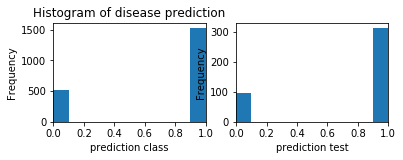

In [42]:
#TEST 01
#trying to write to csv file
#training the above code

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


data=pd.read_csv("dr_features.csv")
data_new=pd.read_csv("dr_features.csv")

predictions=data_new['count']
#data_new

threshold = 30
data_new['pred_value'] = predictions.apply(lambda x: 1 if x > threshold else 0)



features_raw = data_new[[ "count", "area"]]
from sklearn.model_selection import train_test_split

predict_class = data_new['pred_value']



np.random.seed(100)

X_train, X_test, y_train, y_test = train_test_split(features_raw, predict_class, train_size=0.80, random_state=1)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


import sklearn
from sklearn import svm

C = 1.0
# Create SVM classification object 
#svc = svm.SVC(kernel='linear',C=C,gamma=2)
svc = svm.SVC(kernel='linear',C=C,gamma=2)

svc.fit(X_train, y_train)


from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
print(predictions_test)


from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_test))
print(classification_report(y_test, predictions_test))



plt.subplot(221), plt.hist(predict_class, bins=10)
plt.xlim(0,1)
plt.title('Histogram of disease prediction')
plt.xlabel('prediction class')
plt.ylabel('Frequency')

plt.subplot(222), plt.hist(predictions_test, bins=10)
plt.xlim(0,1)
plt.xlabel('prediction test')
plt.ylabel('Frequency')

data_new.plot(data_new["count"], data_new["area"],kind="scatter",color="red")
plt.subplot(223), plt.show()

count=0
with open('dr_features.csv','r') as csvinput:
    with open('dr_features_output.csv', 'w') as csvoutput:
        writer = csv.writer(csvoutput, lineterminator='\n')
        reader = csv.reader(csvinput)

        all = []
        row = next(reader)
        row.append('pred_values')
        all.append(row)

        for row in reader:
            row.append(predict_class[count])
            count = count + 1
                           
            all.append(row)

        writer.writerows(all)
        
        



In [49]:
#TEST 02
#Same above code
#for test a single image value


import cv2 as cv2   #importing opevcv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


predictions=data_new['count']
#data_new

numOfContours=0


#start test code

#imgPath = input("enter path/name.ext of the image")

img = cv2.imread(os.path.join("dataset/11085_left.jpeg"))    #reading an image
img_rs= cv2.resize(img, (430, 320))     #orginal image resizing
cv2.imshow('orginal', img_rs)
    
#ROI manual specs
x = 65
y = 65
w = 300
h = 190

imCrop = img_rs[y:y+h, x:x+w]
cv2.imshow("Image", imCrop)
hsv_im = cv2.cvtColor(imCrop, cv2.COLOR_BGR2HSV)  #converting the  image to HSV
    
clr_rng_img = cv2.inRange(hsv_im,(19,0,111), (255,255,255)) 
    
#contour drawing test code
image, contours, hierarchy = cv2.findContours(clr_rng_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
numOfContours = len(contours)   #number of contours
    
#print("contours = ",numOfContours)
area = []

for contour in contours:
    x1,y1,w1,h1 = cv2.boundingRect(contour)
    cv2.rectangle(imCrop, (x1,y1), (x1+w1, y1+h1), (0,0,255), 1)
    area.append(w1*h1)

    try:
        maxArea = max(area)
        #print("max area = ", maxArea)
    except:
        maxArea = 0
    try:
        area.remove(maxArea)
    except:
        maxArea = 0
            
    #sumOfArea = sum(area)
    #print("sum of Area =",sumOfArea)
    #cv2.imshow("Bounding box",imCrop)

print(area)
print(sum(area))
print(numOfContours)
input_data = pd.DataFrame([[100,50]])

print(input_data)
#End test cod




predictions_test = svc.predict(input_data)
print(predictions_test)

if(predictions_test):
    print("The patient is DIABETIC")
else:
    print("NOT DIABETIC")


        


[]
0
119
     0   1
0  100  50
[1]
The patient is DIABETIC
